In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

W0717 20:49:52.425858  7660 deprecation_wrapper.py:119] From E:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 20:49:52.454859  7660 deprecation_wrapper.py:119] From E:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 20:49:52.459860  7660 deprecation_wrapper.py:119] From E:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 20:49:52.526864  7660 deprecation_wrapper.py:119] From E:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0717 20:49:53.078895  7660 deprecation_wrapper.py:119] From E:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py

In [3]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = r'D:\keras\cat and dog'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [6]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))


W0717 21:26:31.260199  7660 deprecation.py:506] From E:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0717 21:26:31.332203  7660 deprecation_wrapper.py:119] From E:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 21:26:31.357203  7660 deprecation.py:323] From E:\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 7s 3ms/step - loss: 0.6003 - acc: 0.6710 - val_loss: 0.4325 - val_acc: 0.8500
Epoch 2/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.4308 - acc: 0.7995 - val_loss: 0.3578 - val_acc: 0.8820
Epoch 3/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3597 - acc: 0.8525 - val_loss: 0.3149 - val_acc: 0.8840
Epoch 4/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3237 - acc: 0.8625 - val_loss: 0.3004 - val_acc: 0.8810
Epoch 5/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2847 - acc: 0.8840 - val_loss: 0.2779 - val_acc: 0.8960
Epoch 6/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2653 - acc: 0.8975 - val_loss: 0.2694 - val_acc: 0.9000
Epoch 7/30
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2374 - acc: 0.9030 - val_loss: 0.2579 - val_acc: 0.8930
Epoch 8/30
200

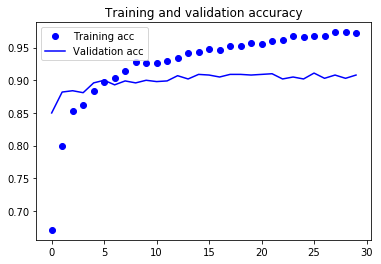

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

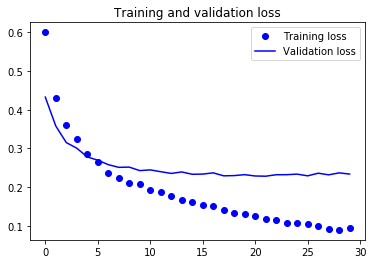

In [9]:


plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [13]:
conv_base.trainable = False

In [14]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 1012s 10s/step - loss: 0.5903 - acc: 0.6915 - val_loss: 0.4583 - val_acc: 0.8270
Epoch 2/30
100/100 [==============================] - 1040s 10s/step - loss: 0.4967 - acc: 0.7745 - val_loss: 0.3753 - val_acc: 0.8610
Epoch 3/30
100/100 [==============================] - 1031s 10s/step - loss: 0.4334 - acc: 0.8095 - val_loss: 0.3275 - val_acc: 0.8750
Epoch 4/30
100/100 [==============================] - 1078s 11s/step - loss: 0.4074 - acc: 0.8280 - val_loss: 0.3066 - val_acc: 0.8870
Epoch 5/30
100/100 [==============================] - 1100s 11s/step - loss: 0.3896 - acc: 0.8225 - val_loss: 0.2937 - val_acc: 0.8890
Epoch 6/30
100/100 [==============================] - 1017s 10s/step - loss: 0.3629 - acc: 0.8375 - val_loss: 0.2825 - val_acc: 0.8870
Epoch 7/30
100/100 [==============================] - 1004s 10s/step - loss: 0.3592 - acc: 0.8470 - val_lo

In [16]:
model.save('cats_and_dogs_small_3.h5')

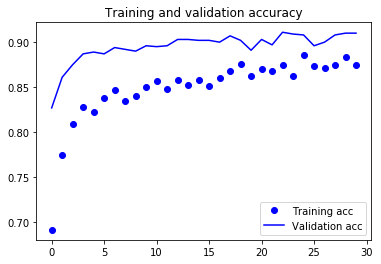

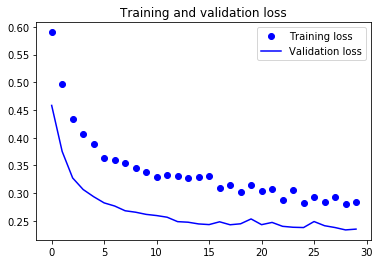

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [19]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [21]:
model.trainable_weights

[<tf.Variable 'block5_conv1/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>,
 <tf.Variable 'block5_conv1/bias:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'block5_conv2/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>,
 <tf.Variable 'block5_conv2/bias:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'block5_conv3/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>,
 <tf.Variable 'block5_conv3/bias:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'dense_3/kernel:0' shape=(8192, 256) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_4/kernel:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32_ref>]

In [22]:
model.non_trainable_weights

[<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block1_conv2/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv2/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block2_conv1/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block2_conv2/kernel:0' shape=(3, 3, 128, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv2/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block3_conv1/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv2/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv2/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv3/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv3

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 9,732,929
Trainable params: 2,097,665
Non-trainable params: 7,635,264
_________________________________________________________________


E:\Anaconda3\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [24]:
model.trainable_weights

[<tf.Variable 'block5_conv1/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>,
 <tf.Variable 'block5_conv1/bias:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'block5_conv2/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>,
 <tf.Variable 'block5_conv2/bias:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'block5_conv3/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>,
 <tf.Variable 'block5_conv3/bias:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'dense_3/kernel:0' shape=(8192, 256) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_4/kernel:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32_ref>]

In [25]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

In [26]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 1137s 11s/step - loss: 0.3089 - acc: 0.8600 - val_loss: 0.2322 - val_acc: 0.9080
Epoch 2/100
100/100 [==============================] - 1129s 11s/step - loss: 0.2489 - acc: 0.8900 - val_loss: 0.2513 - val_acc: 0.9070
Epoch 3/100
100/100 [==============================] - 1135s 11s/step - loss: 0.2501 - acc: 0.8880 - val_loss: 0.2201 - val_acc: 0.9080
Epoch 4/100
100/100 [==============================] - 1121s 11s/step - loss: 0.2224 - acc: 0.9005 - val_loss: 0.1983 - val_acc: 0.9250
Epoch 5/100
100/100 [==============================] - 1128s 11s/step - loss: 0.2214 - acc: 0.9020 - val_loss: 0.1743 - val_acc: 0.9200
Epoch 6/100
100/100 [==============================] - 1122s 11s/step - loss: 0.1910 - acc: 0.9195 - val_loss: 0.2050 - val_acc: 0.9320
Epoch 7/100
100/100 [==============================] - 1120s 11s/step - loss: 0.1965 - acc: 0.9205 - val_loss: 0.1795 - val_acc: 0.9310
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 1146s 11s/step - loss: 0.0402 - acc: 0.9855 - val_loss: 0.3383 - val_acc: 0.9260
Epoch 62/100
100/100 [==============================] - 1178s 12s/step - loss: 0.0365 - acc: 0.9895 - val_loss: 0.2139 - val_acc: 0.9430
Epoch 63/100
100/100 [==============================] - 1147s 11s/step - loss: 0.0264 - acc: 0.9915 - val_loss: 0.2342 - val_acc: 0.9400
Epoch 64/100
100/100 [==============================] - 1138s 11s/step - loss: 0.0335 - acc: 0.9905 - val_loss: 0.2054 - val_acc: 0.9480
Epoch 65/100
100/100 [==============================] - 1177s 12s/step - loss: 0.0311 - acc: 0.9900 - val_loss: 0.2926 - val_acc: 0.9300
Epoch 66/100
100/100 [==============================] - 1176s 12s/step - loss: 0.0378 - acc: 0.9870 - val_loss: 0.4535 - val_acc: 0.9110
Epoch 67/100
100/100 [==============================] - 1177s 12s/step - loss: 0.0313 - acc: 0.9870 - val_loss: 0.2788 - val_acc: 0.9330
Epoch 68/100
100/100 [===================

In [27]:
model.save('cats_and_dogs_small_4.h5')

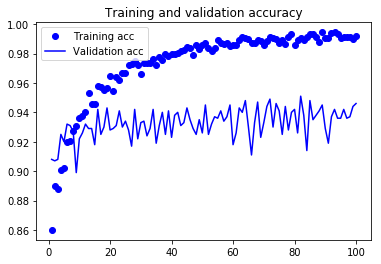

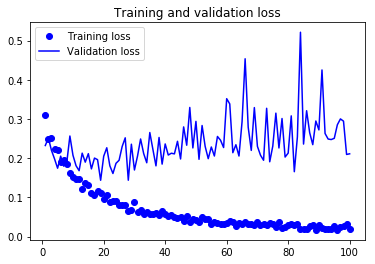

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

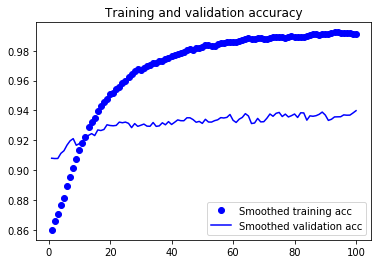

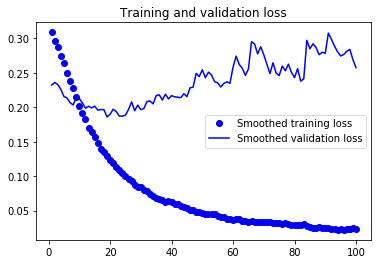

In [29]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()